In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import script as sc

MAX_K = 30

c:\ferramentass\Python3.9\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ferramentass\Python3.9\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\ferramentass\Python3.9\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
scoresGLCM = []

for i in range(1, 7):

    dataGLCMTreino = pd.read_csv(f'{i}_{i}_GLCM_treino.txt', sep=' ', header=None)
    dataGLCMTeste = pd.read_csv(f'{i}_{i}_GLCM_teste.txt', sep=' ', header=None)

    y_train = dataGLCMTreino[dataGLCMTreino.shape[1]-1].values
    X_train = dataGLCMTreino.drop(dataGLCMTreino.shape[1]-1, axis=1).values

    y_test = dataGLCMTeste[dataGLCMTeste.shape[1]-1].values
    X_test = dataGLCMTeste.drop(dataGLCMTeste.shape[1]-1, axis=1).values

    scores, range_k = sc.runKnn(MAX_K, X_train, y_train, X_test, y_test)
    scoresGLCM.append(scores)

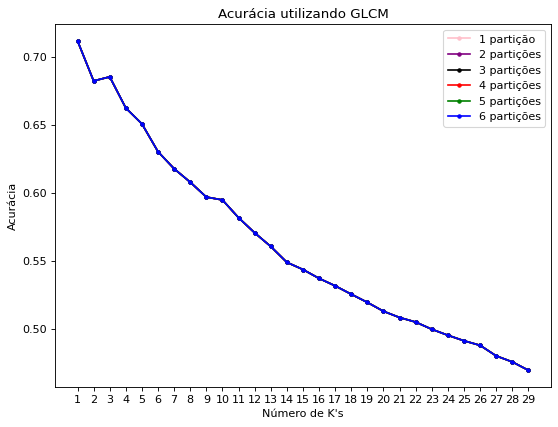

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(range_k, scoresGLCM[0].values(), linestyle='-', marker='.', color='pink', label='1 partição')
plt.plot(range_k, scoresGLCM[1].values(), linestyle='-', marker='.', color='purple', label='2 partições')
plt.plot(range_k, scoresGLCM[2].values(), linestyle='-', marker='.', color='black', label='3 partições')
plt.plot(range_k, scoresGLCM[3].values(), linestyle='-', marker='.', color='red', label='4 partições')
plt.plot(range_k, scoresGLCM[4].values(), linestyle='-', marker='.', color='green', label='5 partições')
plt.plot(range_k, scoresGLCM[5].values(), linestyle='-', marker='.', color='blue', label='6 partições')
plt.title('Acurácia utilizando GLCM')
plt.ylabel('Acurácia')
plt.xlabel("Número de K's")
plt.xticks(range_k)
plt.legend()
plt.savefig('result/plot_GLCM.png', bbox_inches='tight')
plt.show()

In [4]:
scoresLBP = []

for i in range(1, 7):

    dataLBPTreino = pd.read_csv(f'{i}_{i}_LBP_treino.txt', sep=' ', header=None)
    dataLBPTeste = pd.read_csv(f'{i}_{i}_LBP_teste.txt', sep=' ', header=None)

    y_train = dataLBPTreino[dataLBPTreino.shape[1]-1].values
    X_train = dataLBPTreino.drop(dataLBPTreino.shape[1]-1, axis=1).values

    y_test = dataLBPTeste[dataLBPTeste.shape[1]-1].values
    X_test = dataLBPTeste.drop(dataLBPTeste.shape[1]-1, axis=1).values

    scores, range_k = sc.runKnn(MAX_K, X_train, y_train, X_test, y_test)
    scoresLBP.append(scores)

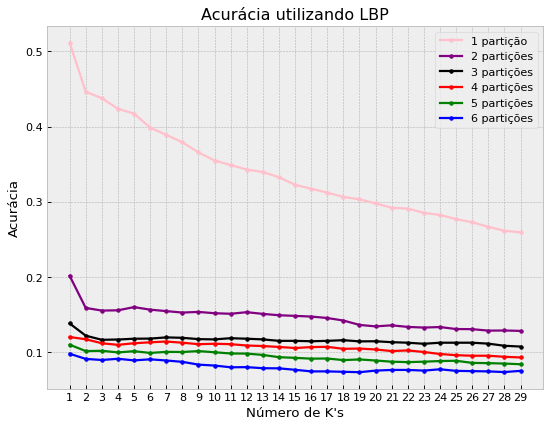

In [5]:
plt.style.use('bmh')
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(range_k, scoresLBP[0].values(), linestyle='-', marker='.', color='pink', label='1 partição')
plt.plot(range_k, scoresLBP[1].values(), linestyle='-', marker='.', color='purple', label='2 partições')
plt.plot(range_k, scoresLBP[2].values(), linestyle='-', marker='.', color='black', label='3 partições')
plt.plot(range_k, scoresLBP[3].values(), linestyle='-', marker='.', color='red', label='4 partições')
plt.plot(range_k, scoresLBP[4].values(), linestyle='-', marker='.', color='green', label='5 partições')
plt.plot(range_k, scoresLBP[5].values(), linestyle='-', marker='.', color='blue', label='6 partições')
plt.title('Acurácia utilizando LBP')
plt.ylabel('Acurácia')
plt.xlabel("Número de K's")
plt.xticks(range_k)
plt.legend()
plt.savefig('result/plot_LBP.png', bbox_inches='tight')
plt.show()

In [6]:
max(scoresLBP[0].values())

0.5112874779541446

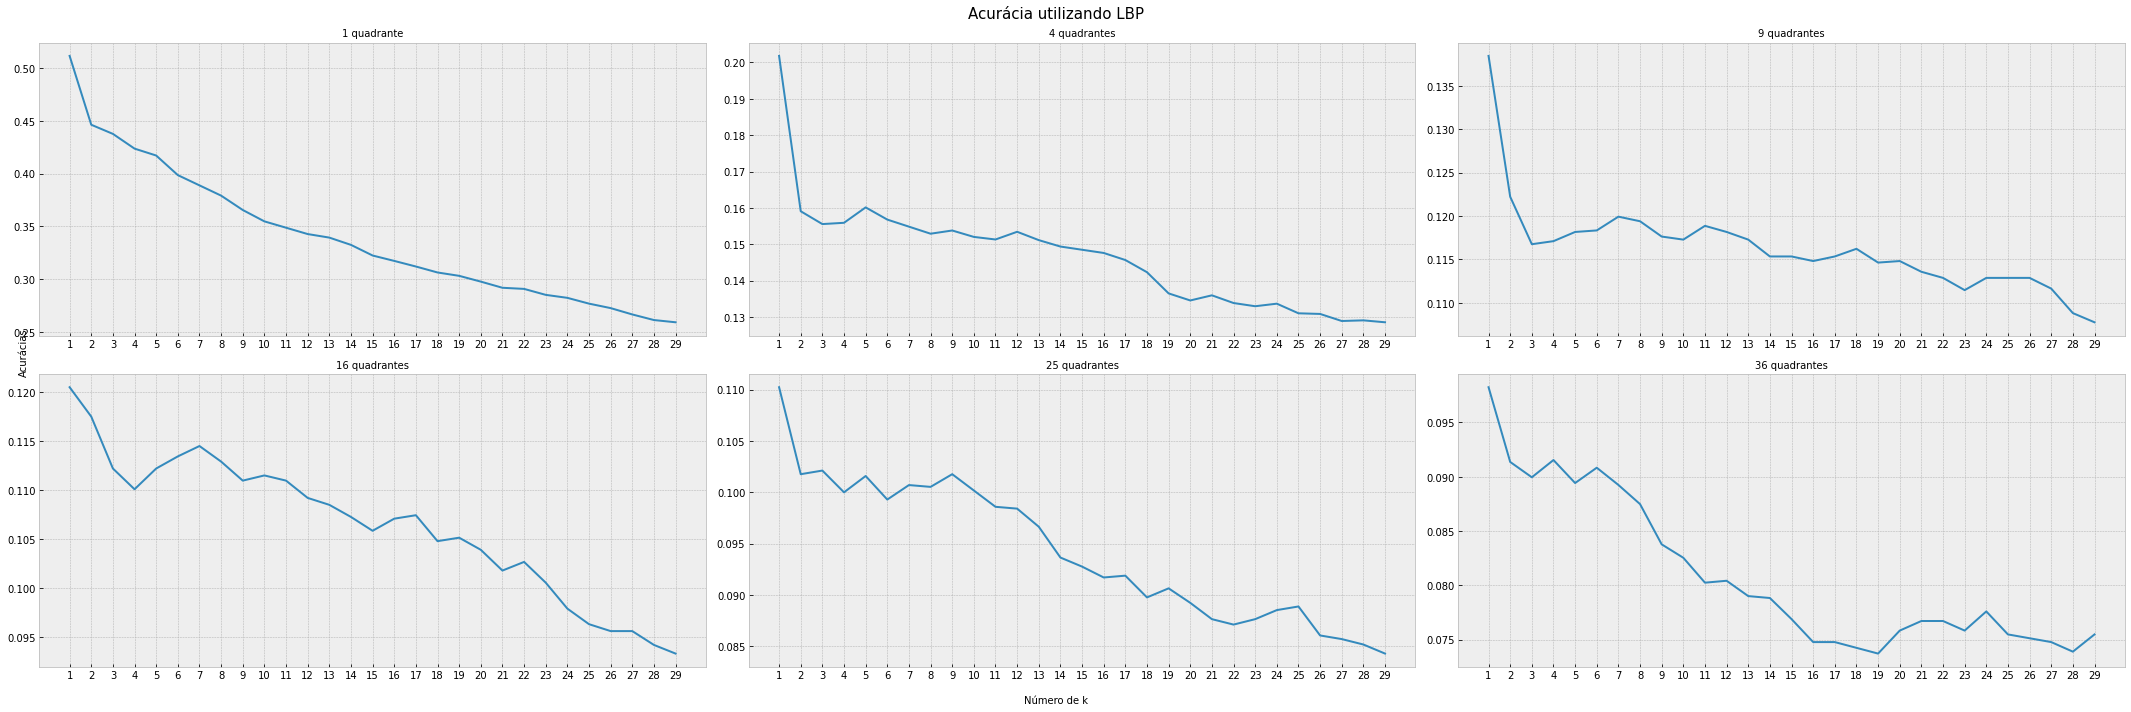

In [7]:
# config
fig, axs = plt.subplots(2, 3, figsize=(30, 10))

axs[0][0].set_xticks(range_k)
axs[0][0].set_title('1 quadrante', fontsize=10)
axs[0][0].plot(range_k, list(scoresLBP[0].values()))

axs[0][1].set_xticks(range_k)
axs[0][1].set_title('4 quadrantes', fontsize=10)
axs[0][1].plot(range_k, list(scoresLBP[1].values()))

axs[0][2].set_xticks(range_k)
axs[0][2].set_title('9 quadrantes', fontsize=10)
axs[0][2].plot(range_k, list(scoresLBP[2].values()))

axs[1][0].set_xticks(range_k)
axs[1][0].set_title('16 quadrantes', fontsize=10)
axs[1][0].plot(range_k, list(scoresLBP[3].values()))

axs[1][1].set_xticks(range_k)
axs[1][1].set_title('25 quadrantes', fontsize=10)
axs[1][1].plot(range_k, list(scoresLBP[4].values()))

axs[1][2].set_xticks(range_k)
axs[1][2].set_title('36 quadrantes', fontsize=10)
axs[1][2].plot(range_k, list(scoresLBP[5].values()))

fig.supylabel('Acurácias', fontsize=10)
fig.supxlabel("Número de k", fontsize=10)
fig.suptitle('Acurácia utilizando LBP', fontsize=15)

fig.tight_layout()
fig.savefig('result/subplot_LBP.png', dpi=fig.dpi, bbox_inches='tight')

plt.show()

In [8]:
scoresGLCMLBP = []

for i in range(1, 7):
    dataGLCMLBPTreino = pd.read_csv(f'{i}_{i}_GLCM_LBP_treino.txt', sep=' ', header=None)
    dataGLCMLBPTeste = pd.read_csv(f'{i}_{i}_GLCM_LBP_teste.txt', sep=' ', header=None)

    y_train = dataGLCMLBPTreino[dataGLCMLBPTreino.shape[1]-1].values
    X_train = dataGLCMLBPTreino.drop(dataGLCMLBPTreino.shape[1]-1, axis=1).values

    y_test = dataGLCMLBPTeste[dataGLCMLBPTeste.shape[1]-1].values
    X_test = dataGLCMLBPTeste.drop(dataGLCMLBPTeste.shape[1]-1, axis=1).values

    scores, range_k = sc.runKnn(MAX_K, X_train, y_train, X_test, y_test)
    scoresGLCMLBP.append(scores)

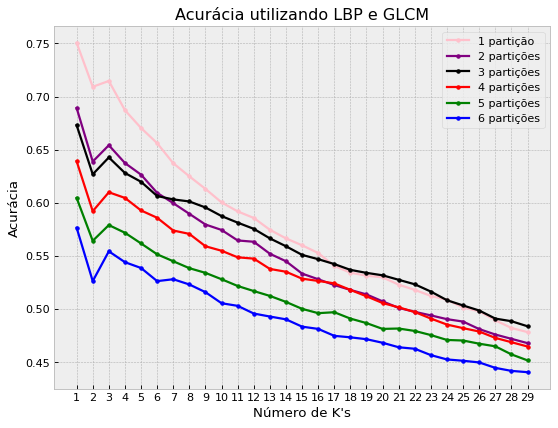

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(range_k, scoresGLCMLBP[0].values(), linestyle='-', marker='.', color='pink', label='1 partição')
plt.plot(range_k, scoresGLCMLBP[1].values(), linestyle='-', marker='.', color='purple', label='2 partições')
plt.plot(range_k, scoresGLCMLBP[2].values(), linestyle='-', marker='.', color='black', label='3 partições')
plt.plot(range_k, scoresGLCMLBP[3].values(), linestyle='-', marker='.', color='red', label='4 partições')
plt.plot(range_k, scoresGLCMLBP[4].values(), linestyle='-', marker='.', color='green', label='5 partições')
plt.plot(range_k, scoresGLCMLBP[5].values(), linestyle='-', marker='.', color='blue', label='6 partições')
plt.title('Acurácia utilizando LBP e GLCM')
plt.ylabel('Acurácia')
plt.xlabel("Número de K's")
plt.xticks(range_k)
plt.legend()
plt.savefig('result/plot_GLCMeLBP.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

In [10]:
max(scoresGLCMLBP[0].values())

0.7506172839506173